In [1]:
%config Completer.use_jedi = False

In [2]:
# Import Libraries and Load Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

ASII = pd.read_csv('ASII.JK.csv', parse_dates=True, squeeze=True)
df = ASII.copy()

In [3]:
# Exploratory Data Analysis
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
newdf = df.iloc[2335:][['Year','Month','Close']]
newdf = newdf.reset_index()
newdf.rename({'Close': 'ASII'}, axis=1, inplace=True)
mydata = newdf.groupby(['Year', 'Month'])[['ASII']].mean()
result = mydata.unstack()
result = result.droplevel(0, axis=1)
result = result[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]
result = result.transpose()

In [4]:
result.style.highlight_min(color = 'lightgreen', axis = 0)

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Month,,,,,,,,,,,
January,3512.750000,4926.428571,7718.095238,7638.095238,6777.500000,7446.428571,6011.250000,8071.590909,8344.565217,8285.869565,6896.590909
February,3547.368421,5013.055556,7333.809524,7727.500000,6655.000000,7818.421053,6675.000000,8058.750000,8306.250000,7835.000000,6153.750000
March,3979.545455,5521.086957,7102.142857,7876.315789,7317.500000,8052.272727,7126.190476,8437.500000,7571.590909,7219.047619,4631.904762
April,4489.523810,5586.750000,7321.750000,7661.363636,7772.619048,7882.142857,7223.809524,8708.333333,7535.714286,7606.818182,3817.619048
May,4139.736842,5832.142857,6875.000000,7111.363636,7480.555556,7459.210526,6483.750000,8705.000000,7027.173913,7168.478261,3948.125000
June,4576.136364,5941.500000,6689.285714,6794.736842,7260.714286,6969.047619,6789.772727,8879.545455,6807.142857,7466.250000,4871.666667
July,4892.045455,6984.250000,6736.363636,6600.000000,7588.157895,6757.894737,7350.000000,8507.142857,6610.227273,7253.260870,5037.045455
August,4825.714286,6827.105263,7071.052632,6120.588235,7680.000000,6203.750000,8093.181818,7891.304348,7321.739130,6638.636364,5236.944444
September,5450.588235,6519.750000,7255.000000,6323.809524,7351.136364,5816.666667,8311.904762,7828.571429,7161.250000,6634.523810,4829.318182


Text(0.5, 1.0, 'Astra International (ASII)')

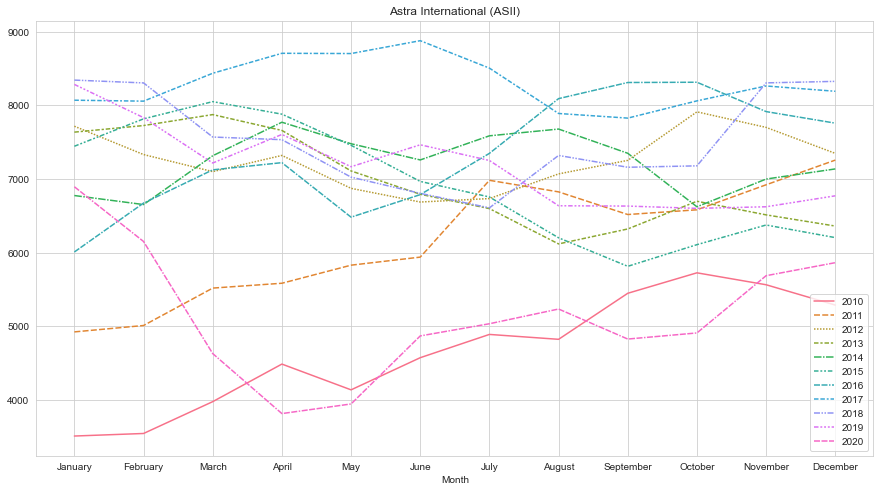

In [5]:
# Data Visualization
f, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=result)
plt.legend(loc='lower right')
plt.title('Astra International (ASII)')